# Временные ряды

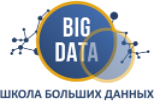

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# ежедневные данные о родившихся в Калифорнии в 1959 году девочках
births = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/time series/births.csv', index_col = 'Date', parse_dates = True)
# ежемесячные данные о количестве пассажиров, перевезенных авиакомпанией с 1949 по 1960 годы
passengers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time series/passengers.csv", index_col = 'Month', parse_dates = True)

In [ ]:
births.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [ ]:
passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Преобразование временных рядов

### Изменение шага

In [ ]:
# "resample" ряда. Например, можно посмотреть среднее по годам
passengers.resample(rule = 'YS').mean().head(10)

,#Passengers
Month,
1949-01-01,126.666667
1950-01-01,139.666667
1951-01-01,170.166667
1952-01-01,197.000000
1953-01-01,225.000000
1954-01-01,238.916667
1955-01-01,284.000000
1956-01-01,328.250000
1957-01-01,368.416667


### Скользящее среднее

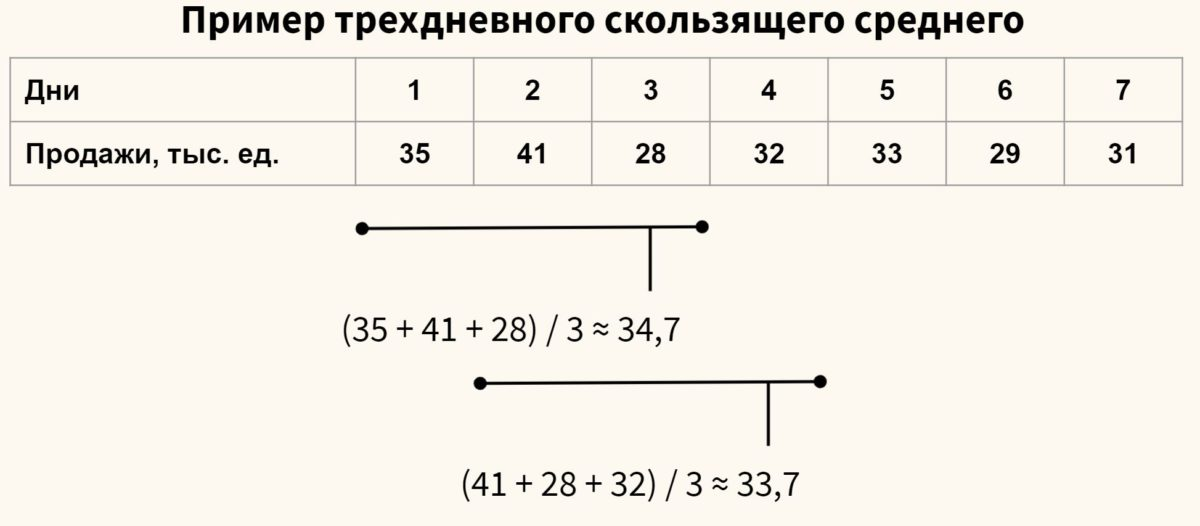

In [ ]:
passengers.rolling(window = 3).mean().head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,120.666667
1949-04-01,126.333333
1949-05-01,127.333333
1949-06-01,128.333333
1949-07-01,134.666667
1949-08-01,143.666667
1949-09-01,144.000000


## Графики

Можно с помощью встроенного метода .plot() у объекта DataFrame в pandas

<Axes: xlabel='Date'>

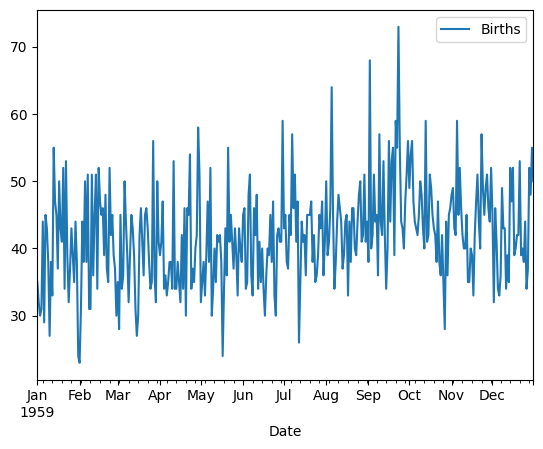

In [ ]:
births.plot()

Можно усложнять в библиотеке matplotlib

Выведем на одном графике перевозки пассажиров и скользящее среднее

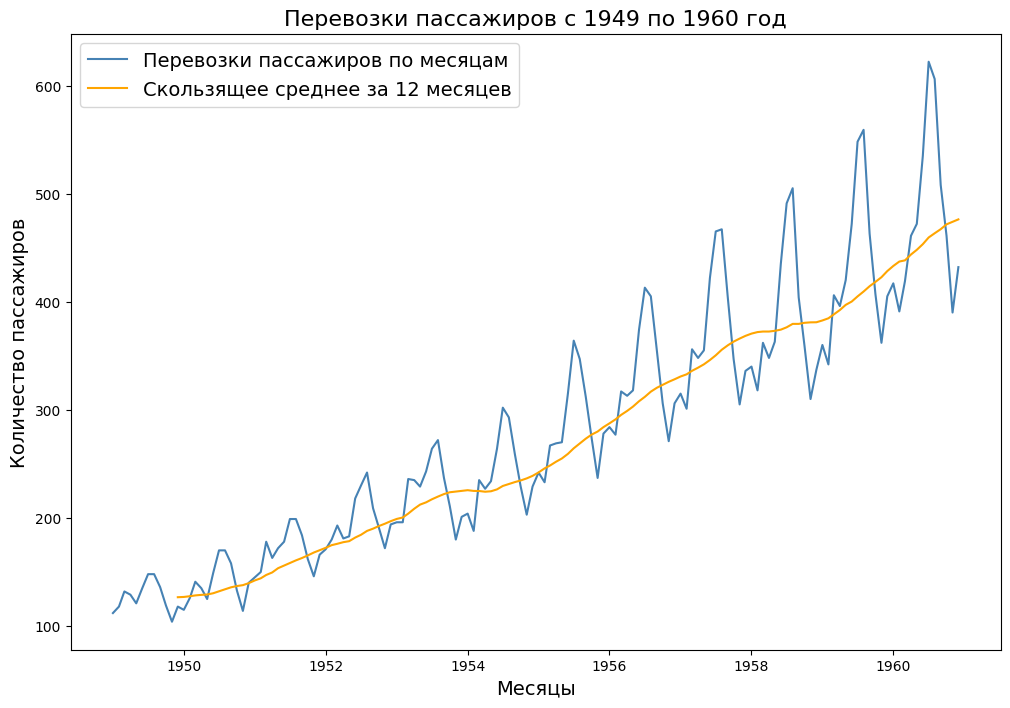

In [ ]:
# зададим размер графика
plt.figure(figsize = (12,8))

# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(passengers, label = 'Перевозки пассажиров по месяцам', color = 'steelblue')
plt.plot(passengers.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Количество пассажиров', fontsize = 14)
plt.title('Перевозки пассажиров с 1949 по 1960 год', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()

## Тренд и сезонность

Напомню понятия:

*   Тренд показывает направление изменений в данных на протяжении времени. Например, рост или спад
*   Сезонность отражает повторяющиеся паттерны, такие как увеличение продаж перед праздниками.

В Python в библиотеке statsmodels есть функция seasonal_decompose(). Воспользуемся ей для визуализации компонентов ряда.

Проверим работу этой функции на датасете births и passengers.



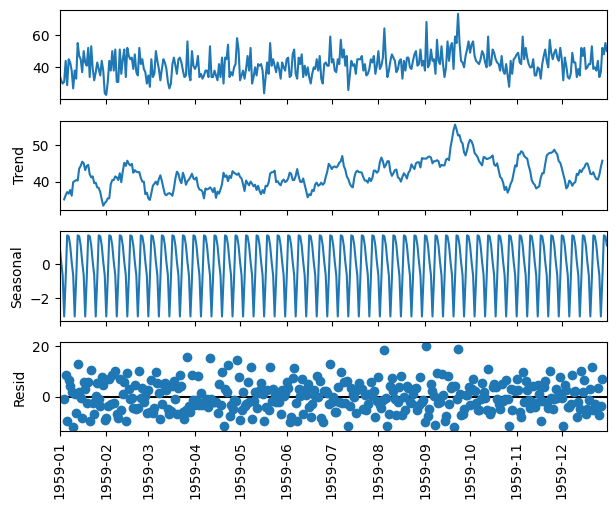

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


decompose = seasonal_decompose(births)
decompose.plot()
plt.xticks(rotation=90)
plt.show()

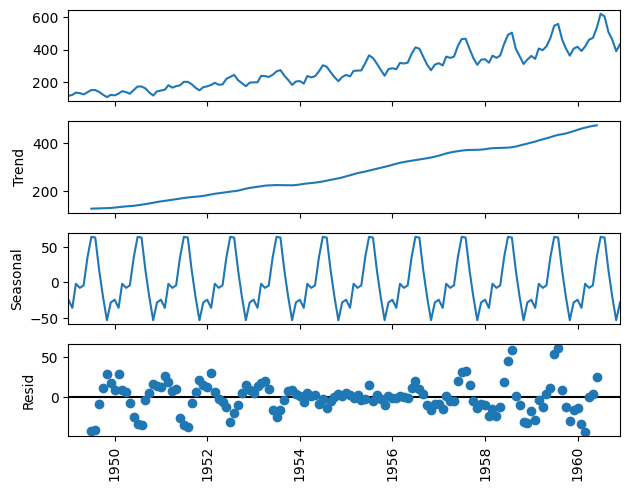

In [ ]:

decompose = seasonal_decompose(passengers)
decompose.plot()
plt.xticks(rotation=90)
plt.show()

## Стационарность

Стационарность (stationarity) временного ряда как раз означает, что такие компоненты как тренд и сезонность отсутствуют.


Графики разложения на компоненты вы уже могли видеть в прошлом видео и можете знать, что визуальный анализ графиков может нам подсказать, что в датасете births отсутствуют тренд и сезонность (стационарный ряд), в то время как в наборе данных об авиаперевозках наоборот наблюдаем их очевидное наличие (не стационарный ряд)

### Тест Дики-Фулера

Для более точной оценки стационарности можно применить тест Дики-Фуллера (Dickey-Fuller test).

В данном случае гипотезы звучат следующим образом:

*   нулевая гипотеза предполагает, что процесс нестационарный;
*   альтернативная гипотеза соответственно говорит о стационарности процесса;

Применим этот тест к обоим датасетам. Используем пороговое значение, равное 0,05 (5%).

In [ ]:
from statsmodels.tsa.stattools import adfuller

# не стационарный
adf_test = adfuller(passengers['#Passengers'])

print('p-value = ' + str(adf_test[1]))

p-value = 0.991880243437641


In [ ]:
adf_test = adfuller(births['Births'])

# стационарный
print('p-value = ' +str(adf_test[1]))

p-value = 5.2434129901498554e-05


### Автокорреляционная функция (ACF)

При изучении статистики вы неизменно познакомитесь с понятием корреляции. Мы с вами скажем просто, что *корреляция* показывает силу взаимосвязи двух переменных.

Автокорреляция — статистическая взаимосвязь между последовательностями величин одного ряда, взятыми со сдвигом.



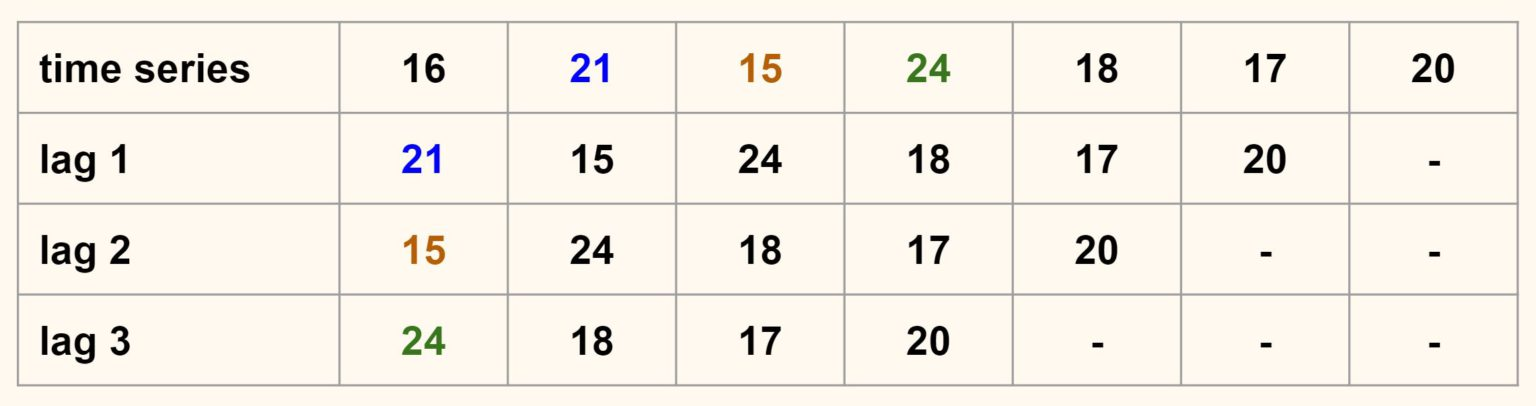

In [ ]:
data = np.linspace(1, 20, 21) * (np.random.randn() + 0.5)**2
print("Изначальный ряд: ", data)
shift_1 = data[1:]
print(f"Ряд со сдвигом 1: {shift_1}")
print("Ряд со сдвигом 2: ", data[2:])

Изначальный ряд:  [ 1.05732331  2.06178046  3.06623761  4.07069476  5.07515191  6.07960906
  7.08406621  8.08852336  9.0929805  10.09743765 11.1018948  12.10635195
 13.1108091  14.11526625 15.1197234  16.12418054 17.12863769 18.13309484
 19.13755199 20.14200914 21.14646629]
Ряд со сдвигом 1: [ 2.06178046  3.06623761  4.07069476  5.07515191  6.07960906  7.08406621
  8.08852336  9.0929805  10.09743765 11.1018948  12.10635195 13.1108091
 14.11526625 15.1197234  16.12418054 17.12863769 18.13309484 19.13755199
 20.14200914 21.14646629]
Ряд со сдвигом 2:  [ 3.06623761  4.07069476  5.07515191  6.07960906  7.08406621  8.08852336
  9.0929805  10.09743765 11.1018948  12.10635195 13.1108091  14.11526625
 15.1197234  16.12418054 17.12863769 18.13309484 19.13755199 20.14200914
 21.14646629]


In [ ]:
data = np.array([16, 21, 15, 24, 18, 17, 20])
shift_1 = data[1:]

In [ ]:
# посчитаем корреляцию для лага 1 (у исходных данных мы убрали последний элемент)
# так как мы получим корреляционную матрицу, возьмем первую строку и второй столбец [0, 1]
np.round(np.corrcoef(data[:-1], shift_1)[0,1], 2)

-0.71

Аналогично мы можем посчитать корреляцию для лагов 2 и 3 и на самом деле любого другого лага. Такие измерения автокорреляции удобно вычислить и изобразить с помощью графика **автокорреляционной функции** (autocorrelation function, **ACF**).

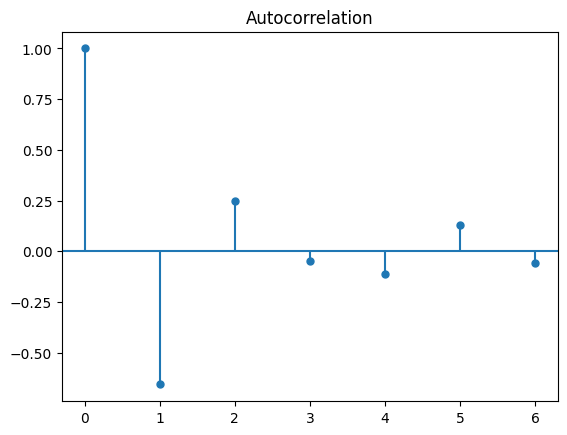

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data, lags = np.arange(len(data)), alpha = None)

plt.axis('tight')
plt.show()

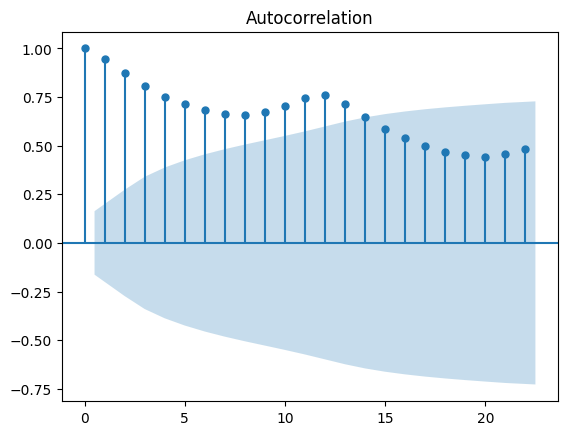

In [ ]:
# Теперь построим график ACF для данных passengers

plot_acf(passengers)
plt.axis('tight')
plt.show()

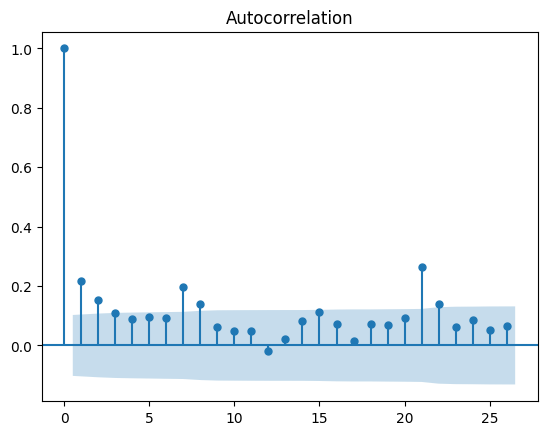

In [ ]:
plot_acf(births)
plt.axis('tight')
plt.show()

#  Моделирование и построение прогноза



*   Экспоненциальное сглаживание
*   Модель ARMA (и ее более продвинутые версии, ARIMA, SARIMA и SARIMAX)




## Экспоненциальное сглаживание
Вспомним скользящее среднее:

*   всем предыдущим наблюдениям задавался одинаковый вес и
*   количество таких наблюдений было ограничено (мы называли это размером окна).



Однако, зачем нам ограничивать количество наблюдений, но в то же время предположение о том, что крайние наблюдения более важны для предсказаний, чем ранние также верно.

В модели экспоненциального сглаживания (exponential smoothing) или экспоненциально взвешенного скользящего среднего мы, во-первых, берем все предыдущие значения и, во-вторых, задаем каждому из наблюдений определенный вес и (экспоненциально) уменьшаем этот вес по мере углубления в прошлое.


Подробнее как работает можно [ознакомиться](http://www.machinelearning.ru/wiki/index.php?title=%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%81%D0%B3%D0%BB%D0%B0%D0%B6%D0%B8%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5):


In [ ]:
passengers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time series/passengers.csv", parse_dates = True)

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

train_data = passengers['#Passengers'][:120]
test_data = passengers['#Passengers'][120:]

model = ExponentialSmoothing(train_data,
                              trend='add',  # Аддитивный тренд
                              seasonal='add',  # Аддитивная сезонность
                              seasonal_periods=12)  # Период сезонности
fit_model = model.fit()

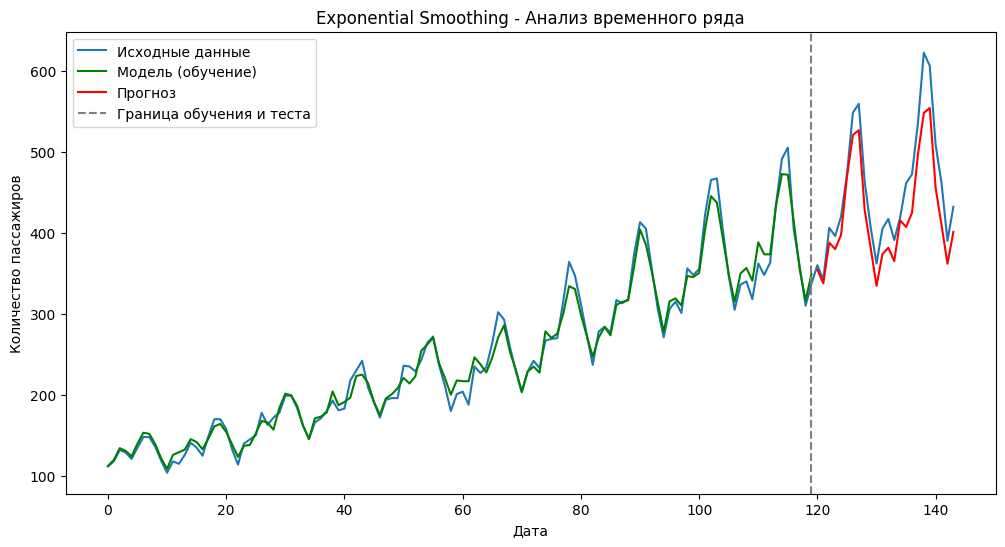

In [ ]:
forecast = fit_model.forecast(steps=len(test_data))

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(passengers.index, passengers['#Passengers'], label='Исходные данные')
plt.plot(train_data.index, fit_model.fittedvalues, label='Модель (обучение)', color='green')
plt.plot(test_data.index, forecast, label='Прогноз', color='red')
plt.axvline(x=train_data.index[-1], linestyle='--', color='gray', label='Граница обучения и теста')
plt.legend()
plt.title("Exponential Smoothing - Анализ временного ряда")
plt.xlabel("Дата")
plt.ylabel("Количество пассажиров")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100

print("Метрики качества модели:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

Метрики качества модели:
MAE: 31.07
MSE: 1278.60
RMSE: 35.76
MAPE: 6.64%


## ARMA

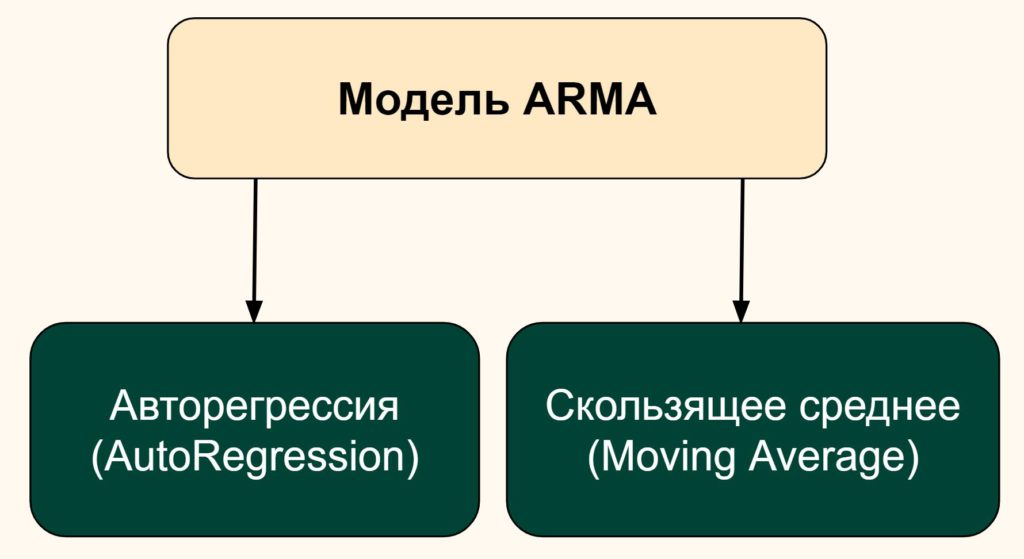

**Авторегрессия (autoregressive model, AR)** — это регрессия ряда на собственные значения в прошлом. Другими словами, признаки в модели обычной регрессии мы заменяем значениями той же переменной, но за предыдущие периоды.

image.png


Количество используемых предыдущих периодов определяется параметром ***p***

 Обычно записывается как **AR(p)**.

**Модель скользящего среднего (moving average, MA)** помогает учесть случайные колебания или отклонения (ошибки) истинного значения от прогнозного. Можно также сказать, что модель скользящего среднего — это авторегрессия на ошибку.

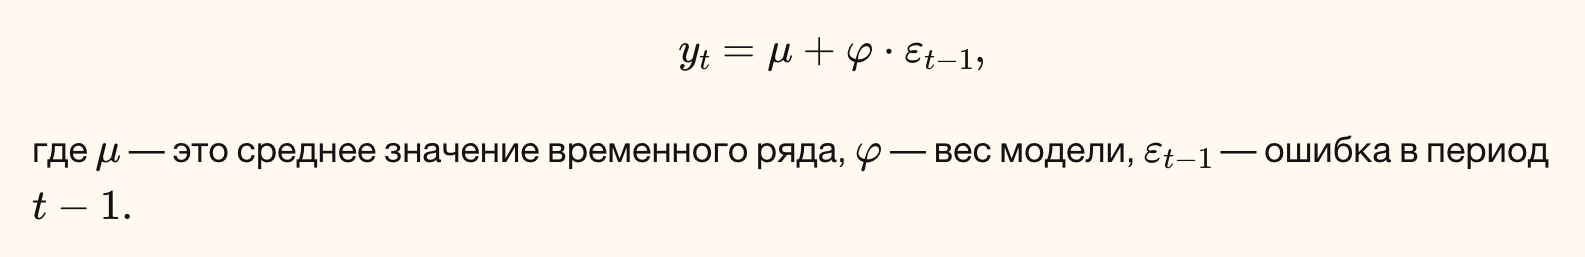

Такую модель принято называть моделью скользящего среднего с параметром q = 1 или MA(1). Разумеется, параметр q может принимать и другие значения (MA(q)).

ARMA предполагает, что в данных отсутствует тренд и сезонность (данные стационарны). Если данные нестационарны, нужно использовать более сложные версии этих моделей:

* ARIMA, здесь добавляется компонент Integrated (I), который отвечает за удаление тренда (сам процесс называется дифференцированием);
* SARIMA, эта модель учитывает сезонность (Seasonality, S);
* SARIMAX включает еще и внешние или экзогенные факторы (eXogenous factors, отсюда и буква X в названии), которые напрямую не учитываются моделью, но влияют на нее.


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = passengers.copy()
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# последние 12 месяцев оставляем для теста
train_data = data['#Passengers'][:-12]
test_data = data['#Passengers'][-12:]

In [ ]:
model = SARIMAX(train_data,
                order=(3, 0, 0),              # ARIMA(p, d, q)
                seasonal_order=(0, 1, 0, 12), # SARIMA(P, D, Q, S)
                enforce_stationarity=False,
                enforce_invertibility=False)


sarima_result = model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast = sarima_result.forecast(steps=12)

mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100

print("Метрики SARIMA модели:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

Метрики SARIMA модели:
MAE: 14.32
MSE: 370.29
RMSE: 19.24
MAPE: 3.22%


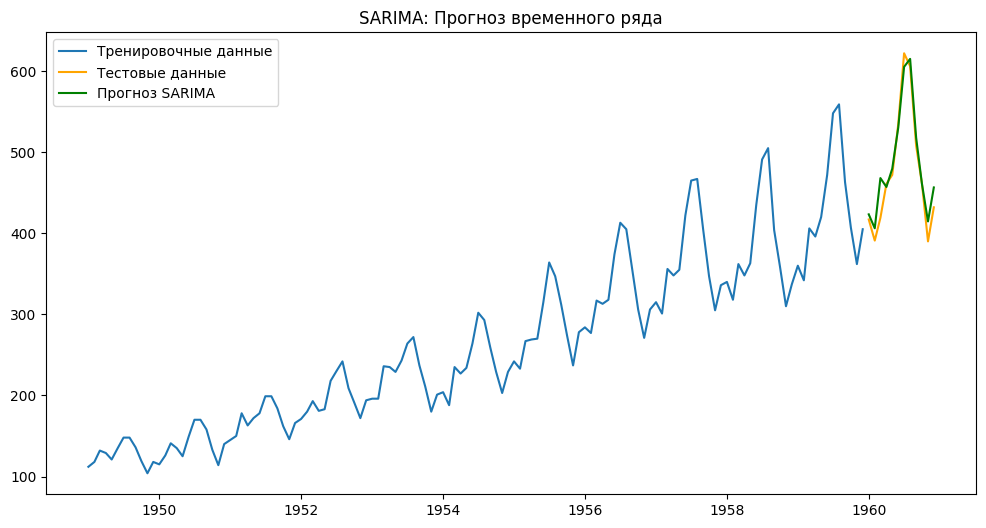

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Тренировочные данные')
plt.plot(test_data, label='Тестовые данные', color='orange')
plt.plot(test_data.index, forecast, label='Прогноз SARIMA', color='green')
plt.legend()
plt.title('SARIMA: Прогноз временного ряда')
plt.show()


In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

auto_model = auto_arima(train_data, seasonal=True, m=12, trace=True)
print(auto_model.summary())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.34 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.10 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.52 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.82 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.28 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.51 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.38 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=905.686, Time=0.17 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(1,1,0)[12] intercept   : AIC=906.124, Time=0.77 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,1,1)[12] intercept   : AIC=906.388, Time=0.55 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(1,1,1)[12] intercept   : AIC=906.035, Time=1.40 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,1,0)[12] intercept   : AIC=907.453, Time=0.32 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,1,0)[12] intercept   : AIC=907.583, Time=0.36 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=906.399, Time=0.32 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,1,0)[12] intercept   : AIC=909.320, Time=0.62 sec
 ARIMA(3,0,0)(0,1,0)[12]             : AIC=911.907, Time=0.12 sec

Best model:  ARIMA(3,0,0)(0,1,0)[12] intercept
Total fit time: 18.253 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Thu, 26 Dec 2024   AIC                            905.686
Time:                                    12:49:39   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Линейная регрессия

Первый подход, который мы рассмотрим, — это линейная регрессия. Для временных рядов линейная регрессия используется не напрямую, а с созданием дополнительных признаков. Мы можем использовать лаги, чтобы модель могла предсказывать будущее на основе прошлого.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

passengers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time series/passengers.csv", parse_dates = True)
df = passengers.copy()
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Создадим лаги
for lag in range(1, 13):  # Добавим лаги на 12 месяцев назад
    df[f'lag_{lag}'] = df['#Passengers'].shift(lag)

In [ ]:
df

,#Passengers,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Month,,,,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-03-01,132,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-04-01,129,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-05-01,121,129.0,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0,559.0
1960-09-01,508,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0
1960-10-01,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0


In [ ]:
# Удаляем пропуски, возникшие из-за лагов
df.dropna(inplace=True)


In [ ]:
X = df.drop('#Passengers', axis=1)
y = df['#Passengers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
# Линейная регрессия
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Оценка модели
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

MAE: 14.125653674281375
RMSE: 18.22804213831072
MAPE: 3.4083908232837703


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Оценка модели
print("MAE (Random Forest):", mean_absolute_error(y_test, y_pred_rf))
print("RMSE (Random Forest):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAPE:", np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100)

MAE (Random Forest): 33.47814814814814
RMSE (Random Forest): 48.15921168759276
MAPE: 6.970213034886015


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo12bdwk/ovvuc6te.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplo12bdwk/rdrc6hnh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44194', 'data', 'file=/tmp/tmplo12bdwk/ovvuc6te.json', 'init=/tmp/tmplo12bdwk/rdrc6hnh.json', 'output', 'file=/tmp/tmplo12bdwk/prophet_modelpsho9bo_/prophet_model-20250123121927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:19:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:19:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

MAE: 33.98
RMSE: 1723.06
MAPE: 6.78%


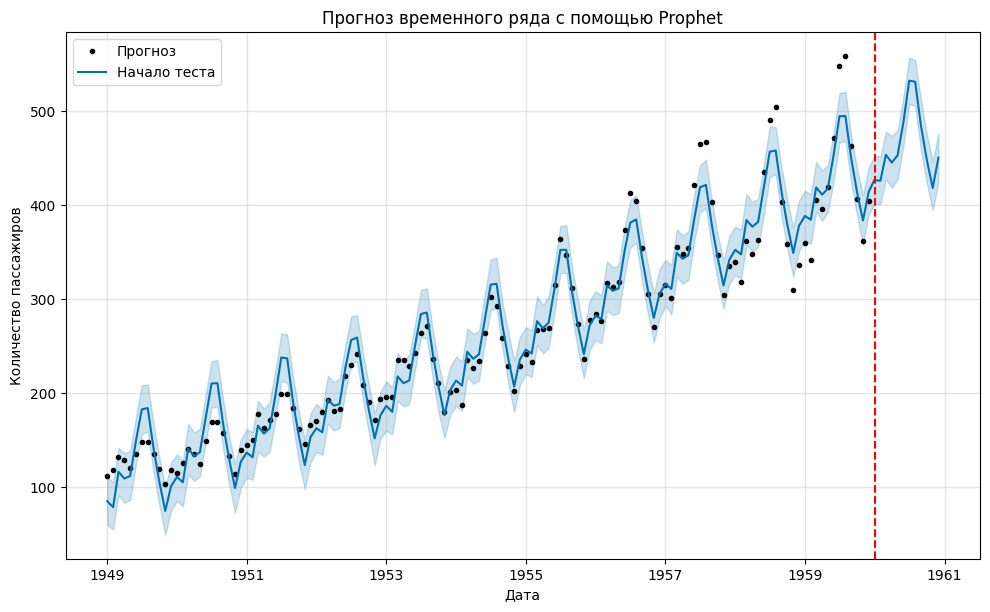

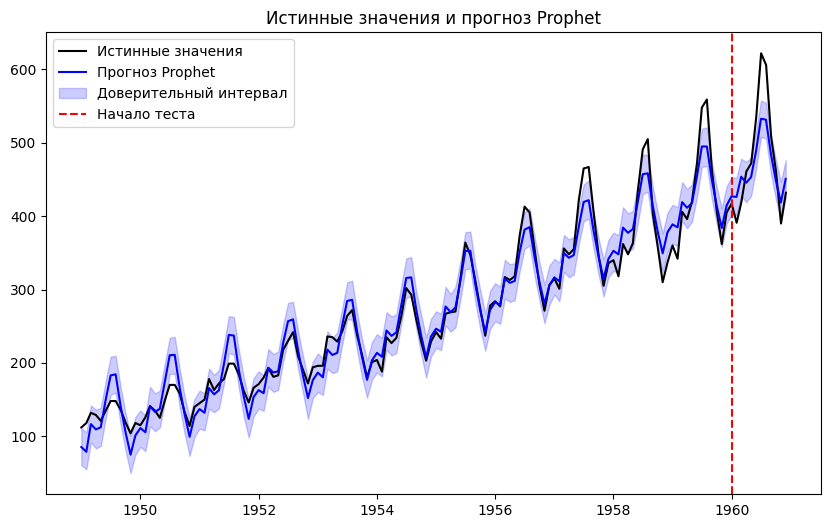

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Подготовка данных для Prophet
passengers['Month'] = pd.to_datetime(passengers['Month'])  # Убедимся, что даты в правильном формате
prophet_df = passengers.rename(columns={'Month': 'ds', '#Passengers': 'y'})

# Разделение на тренировочную и тестовую выборки
train_df = prophet_df[:-12]  # Все, кроме последних 12 записей
test_df = prophet_df[-12:]   # Последние 12 записей для тестирования

# Модель Prophet
prophet_model = Prophet()
prophet_model.fit(train_df)

# Прогноз
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)

# Расчёт метрик
y_test = test_df['y'].values
y_pred = forecast[-12:]['yhat'].values  # Последние 12 прогнозных значений

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Визуализация
fig = prophet_model.plot(forecast)
plt.title('Прогноз временного ряда с помощью Prophet')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.axvline(x=test_df['ds'].iloc[0], color='red', linestyle='--', label='Начало теста')
plt.legend(['Прогноз', 'Начало теста'])
plt.show()

# Отдельный график: Истинные значения vs Прогноз
plt.figure(figsize=(10, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Истинные значения', color='black')
plt.plot(forecast['ds'], forecast['yhat'], label='Прогноз Prophet', color='blue')
plt.fill_between(
    forecast['ds'],
    forecast['yhat_lower'],
    forecast['yhat_upper'],
    color='blue', alpha=0.2, label='Доверительный интервал'
)
plt.axvline(x=test_df['ds'].iloc[0], color='red', linestyle='--', label='Начало теста')
plt.legend()
plt.title('Истинные значения и прогноз Prophet')
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


120/120 - 2s - 17ms/step - loss: 0.0221
Epoch 2/10
120/120 - 1s - 5ms/step - loss: 0.0108
Epoch 3/10
120/120 - 1s - 5ms/step - loss: 0.0096
Epoch 4/10
120/120 - 1s - 5ms/step - loss: 0.0096
Epoch 5/10
120/120 - 1s - 7ms/step - loss: 0.0075
Epoch 6/10
120/120 - 1s - 5ms/step - loss: 0.0071
Epoch 7/10
120/120 - 1s - 5ms/step - loss: 0.0074
Epoch 8/10
120/120 - 1s - 5ms/step - loss: 0.0067
Epoch 9/10
120/120 - 0s - 4ms/step - loss: 0.0047
Epoch 10/10
120/120 - 1s - 4ms/step - loss: 0.0038
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
MAE: 31.33
RMSE: 1797.82
MAPE: 6.15%


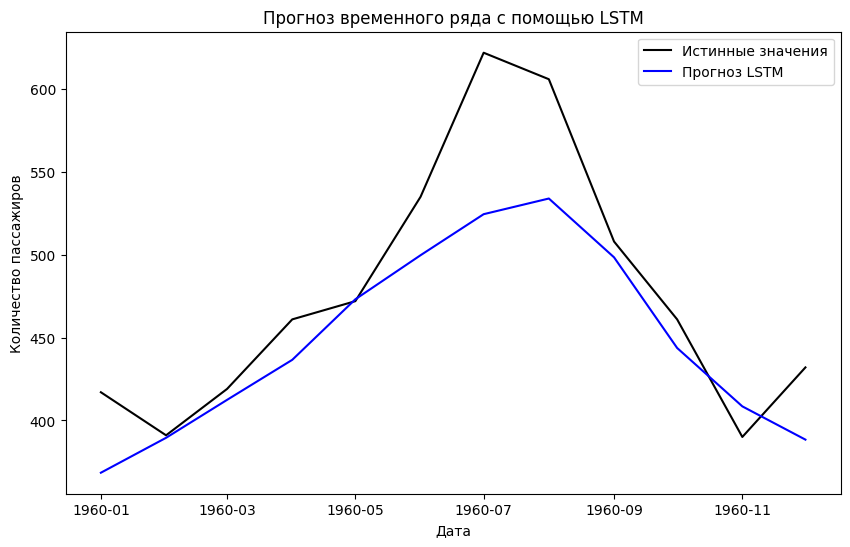

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Загружаем данные
passengers['Month'] = pd.to_datetime(passengers['Month'])
passengers.set_index('Month', inplace=True)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(passengers[['#Passengers']])

# Функция для создания окон (таймстепов)
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Задаём количество временных шагов (lag)
look_back = 12
X, y = create_dataset(data_scaled, look_back)

# Разделение на обучающую и тестовую выборки
train_size = len(X) - 12  # Последние 12 точек оставляем для теста
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Преобразуем входные данные в формат [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Построение модели LSTM
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(look_back, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Прогноз
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Расчёт метрик
mae = mean_absolute_error(y_test_original, y_pred)
rmse = mean_squared_error(y_test_original, y_pred)
mape = np.mean(np.abs((y_test_original - y_pred) / y_test_original)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(passengers.index[-12:], y_test_original, label='Истинные значения', color='black')
plt.plot(passengers.index[-12:], y_pred, label='Прогноз LSTM', color='blue')
plt.title('Прогноз временного ряда с помощью LSTM')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()
